In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [2]:
filename = "homeprices_multi-varaible.csv"
df = pd.read_csv(filename)

print(df)

   area  bedrooms  age  price
0  2600         3   20  55000
1  3000         4   15  56500
2  3200         4   18  61000
3  3600         3   30  59500
4  4000         5    8  76000
5  4100         6    8  81000


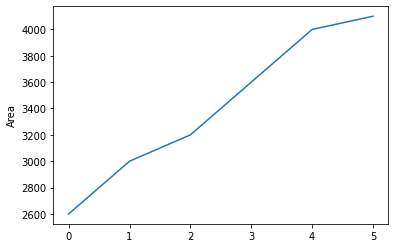

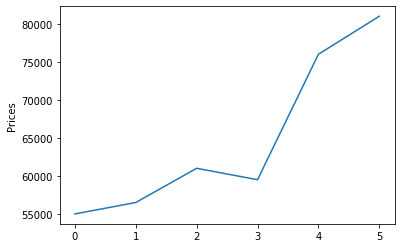

In [3]:
plt.plot(df["area"])
plt.ylabel("Area")
plt.show()

plt.plot(df["price"])
plt.ylabel("Prices")
plt.show()

In [4]:
theta_0 = random.randint(1,100)*0.01
theta_1 =  random.randint(1,100)*0.01
theta_2 =  random.randint(1,100)*0.01
theta_3 =  random.randint(1,100)*0.01
alpha = 0.1

cost_J = np.array([])
prediction = np.array([])
m = len(df)

area = np.array(df.area).reshape(m,1)
bedrooms = np.array(df.bedrooms).reshape(m,1)
age = np.array(df.age).reshape(m,1)
price = np.array(df.price).reshape(m,1)

# Scaling down input to <1 and >-1
std_dev_area = math.sqrt(np.sum(np.square(area-np.mean(area)))/m)
mod_area = (area-np.mean(area))/std_dev_area

std_dev_bed = math.sqrt(np.sum(np.square(bedrooms-np.mean(bedrooms)))/m)
mod_bed = (bedrooms-np.mean(bedrooms))/std_dev_bed

std_dev_age = math.sqrt(np.sum(np.square(age-np.mean(age)))/m)
mod_age = (age-np.mean(age))/std_dev_age

for w in range(500) :
    
    # m*1 matrix
    hypothesis = theta_0 + (theta_1*mod_area) + (theta_2*mod_bed) + (theta_3*mod_age)

    # m*1 matrix
    cost_J = hypothesis - price  

    # Value updation
    theta_0 -= alpha*(np.mean(cost_J))
    theta_1 -= alpha*(np.mean(cost_J*mod_area))
    theta_2 -= alpha*(np.mean(cost_J*mod_bed))
    theta_3 -= alpha*(np.mean(cost_J*mod_age))

print("Theta_0 :",theta_0,"\tTheta_1 :",theta_1,"\tTheta_2 :",theta_2,"\tTheta_3 :",theta_3)

prediction_hp = np.array(theta_0 + (theta_1*mod_area) + (theta_2*mod_bed) + (theta_3*mod_age))
print("Deviation :",(np.mean(np.abs(prediction_hp-price))))
print("Prediction : ",prediction_hp)

Theta_0 : 64833.33333333331 	Theta_1 : 5944.234094211482 	Theta_2 : 2649.5098433734247 	Theta_3 : -2337.537944427144
Deviation : 1540.4581649178654
Prediction :  [[51810.68814208]
 [60268.22344492]
 [61556.4819299 ]
 [59796.66911993]
 [75988.8490192 ]
 [79579.08834397]]


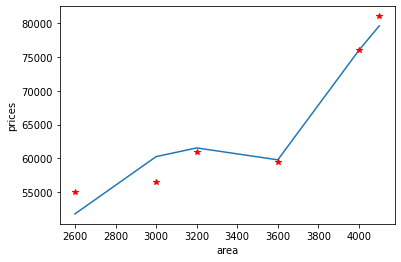

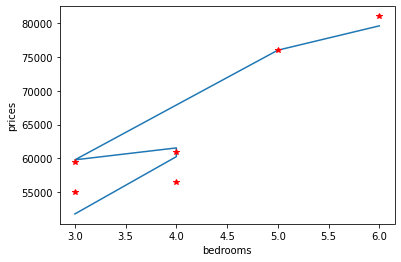

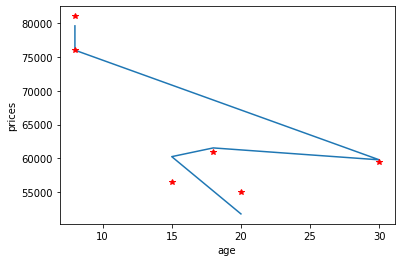

In [5]:
plt.plot(area,prediction_hp,area,price,'r*')
plt.xlabel("area"); plt.ylabel("prices")
plt.show()

plt.plot(bedrooms,prediction_hp,bedrooms,price,'r*')
plt.xlabel("bedrooms"); plt.ylabel("prices")
plt.show()

plt.plot(age,prediction_hp,age,price,'r*')
plt.xlabel("age"); plt.ylabel("prices")
plt.show()